MSE: 53.628261528100296


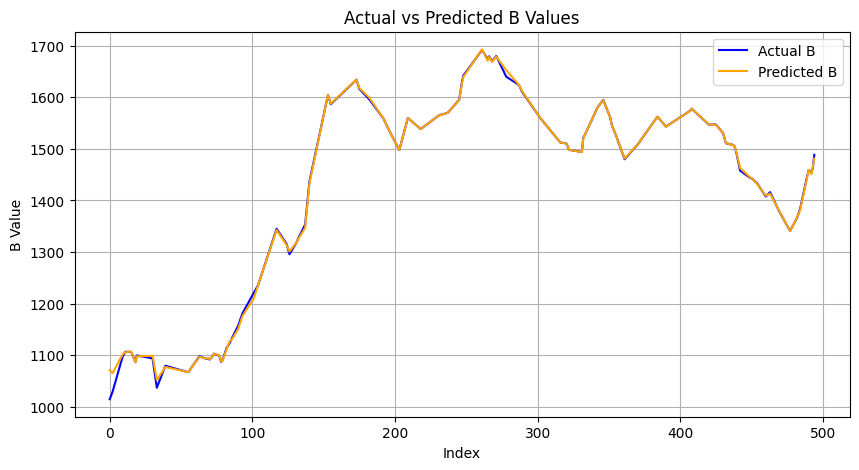

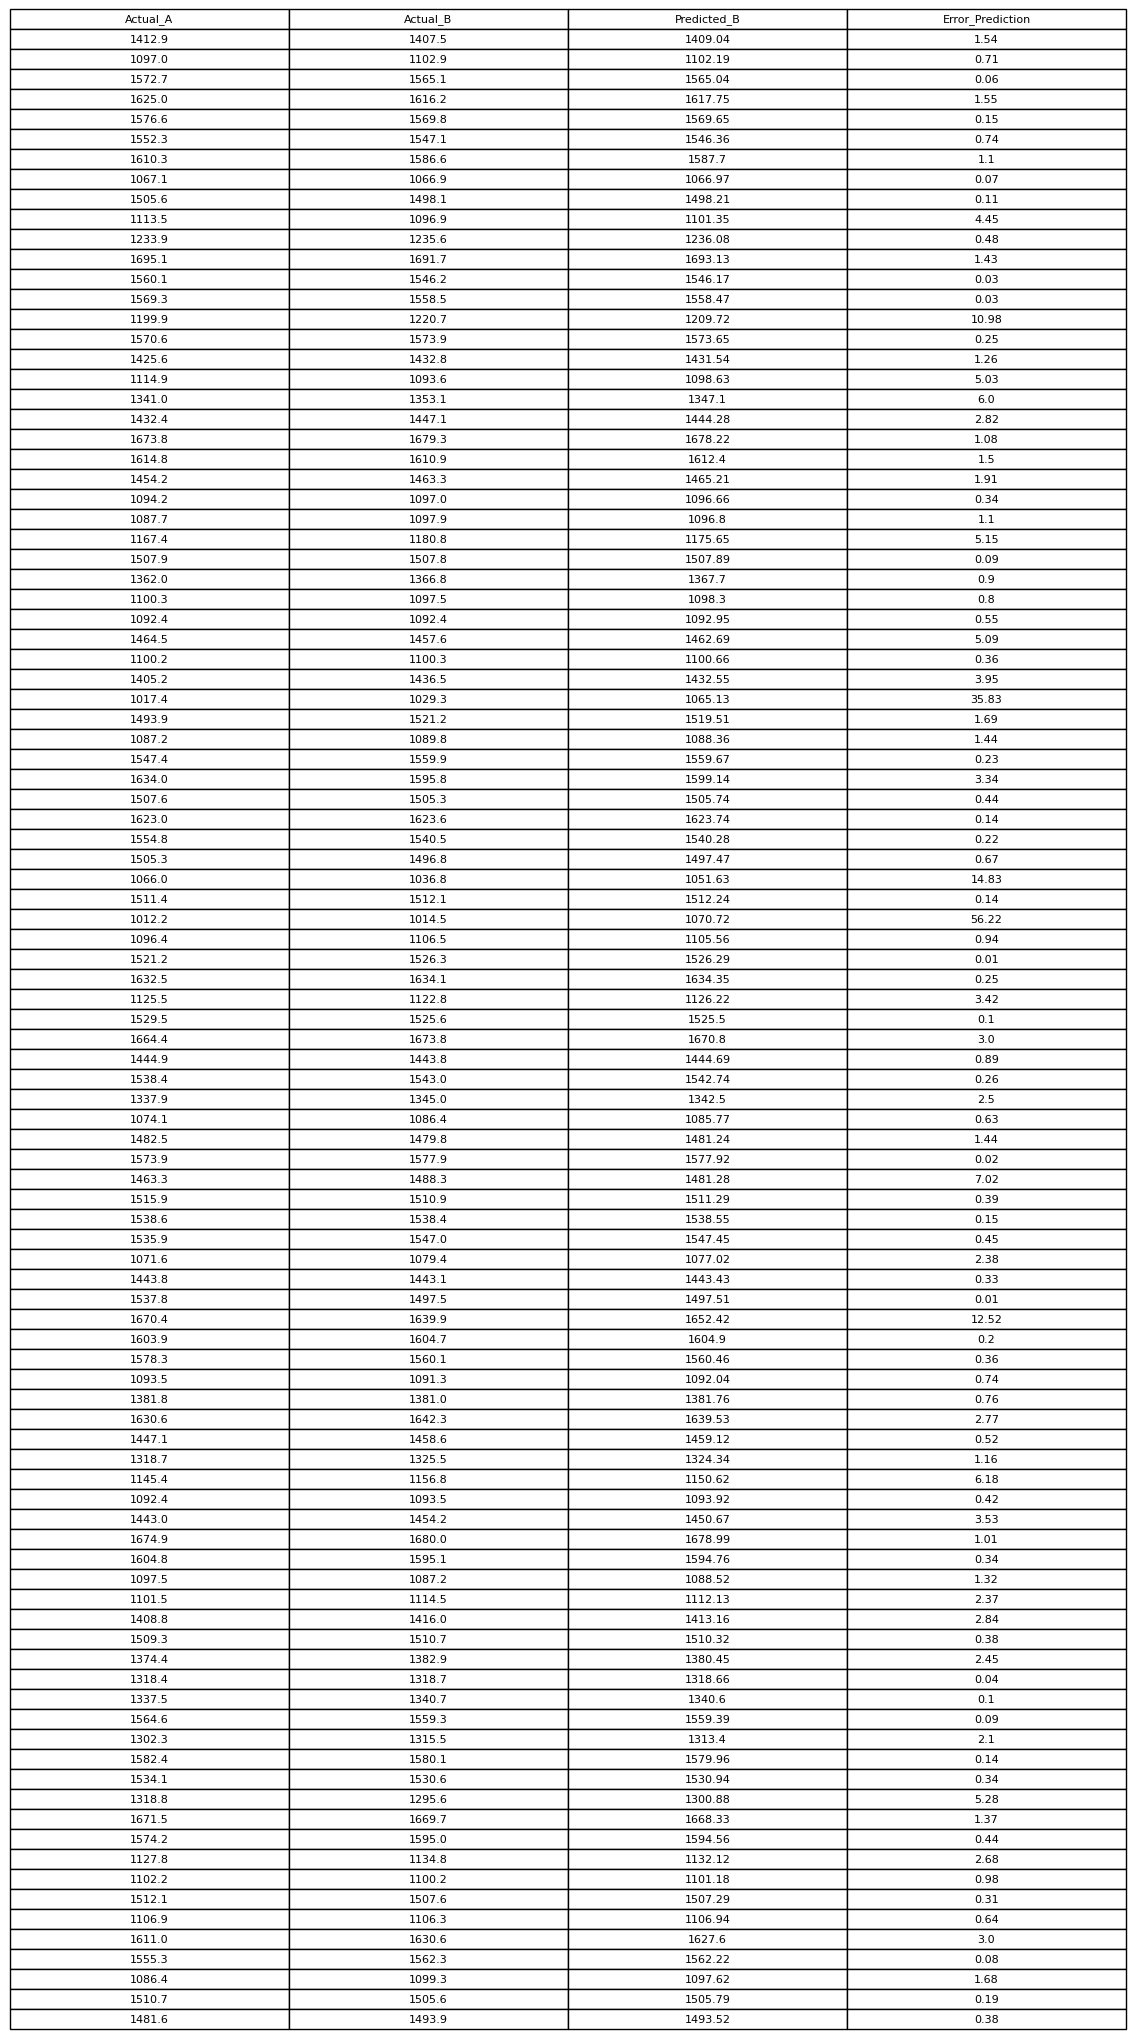

In [ ]:
import pandas as pd
import numpy as np
import gdown
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def generate_membership_values(data, num_points, sigma):
    """Generate Gaussian membership values for data using specified parameters."""
    values = np.linspace(data.min(), data.max(), num_points)
    return np.exp(-0.5 * ((data[:, np.newaxis] - values) ** 2) / sigma**2)

class TehranStockModel:
    def __init__(self):
        self.url = 'https://drive.google.com/uc?id=196FqeYd39uvgEsNEyzBZ73_b7bi6Blkl'
        self.file_path = 'Tehran Stock Exchange Dataset.xlsx'

    def load_data(self):
        """Download and load data from Google Drive into a pandas DataFrame."""
        gdown.download(self.url, self.file_path, quiet=True)
        data = pd.read_excel(self.file_path)
        data.columns = ['A']
        data['B'] = data['A'].shift(-1).fillna(method='ffill')
        return data

    def preprocess_data(self, data):
        """Normalize the columns 'A' and 'B'."""
        data['A_normalized'] = (data['A'] - data['A'].min()) / (data['A'].max() - data['A'].min())
        data['B_normalized'] = (data['B'] - data['B'].min()) / (data['B'].max() - data['B'].min())
        return data

    def prepare_inputs(self, data):
        """Prepare the input features using Gaussian membership functions."""
        A_membership = generate_membership_values(data['A_normalized'].values, 20, sigma=0.5)
        B_membership = generate_membership_values(data['B_normalized'].values, 20, sigma=0.5)
        combined_inputs = np.einsum('ij,ik->ijk', A_membership, B_membership).reshape(len(data), -1)
        return combined_inputs, data['B']

    def train_and_evaluate_model(self, inputs, targets):
        """Train and evaluate a RandomForest regression model, return results for analysis."""
        X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
        model = RandomForestRegressor(n_estimators=100)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        print(f'MSE: {mse}')
        return X_test, y_test, y_pred

    def display_results(self, data, y_test, y_pred):
        """Visualize the results and display the data in a table."""
        data_test = pd.DataFrame({
            'Actual_A': data['A'][y_test.index],
            'Actual_B': y_test.round(2),
            'Predicted_B': y_pred.round(2),
            'Error_Prediction': (y_test - y_pred).abs().round(2)
        })

        plt.figure(figsize=(10, 5))
        sns.lineplot(data=data_test, x=data_test.index, y='Actual_B', label='Actual B', color='blue')
        sns.lineplot(data=data_test, x=data_test.index, y='Predicted_B', label='Predicted B', color='orange')
        plt.title('Actual vs Predicted B Values')
        plt.xlabel('Index')
        plt.ylabel('B Value')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Display table
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.axis('tight')
        ax.axis('off')
        the_table = ax.table(cellText=data_test.values, colLabels=data_test.columns, loc='center', cellLoc='center')
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(8)
        the_table.scale(1.2, 1.2)
        plt.show()

if __name__ == "__main__":
    model = TehranStockModel()
    data = model.load_data()
    data = model.preprocess_data(data)
    inputs, targets = model.prepare_inputs(data)
    X_test, y_test, y_pred = model.train_and_evaluate_model(inputs, targets)
    model.display_results(data, y_test, y_pred)


Train MSE: 34.40672203722785
Test MSE: 236.3398294068855


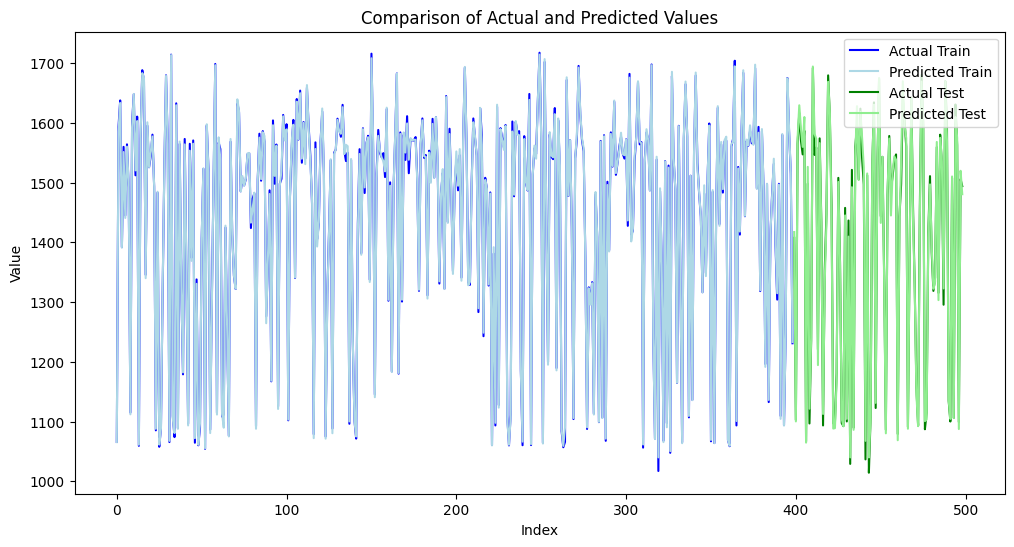

In [ ]:
import pandas as pd
import numpy as np
import gdown
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

def generate_membership_values(data, num_points, sigma):
    """Enhance the Gaussian-based membership functions."""
    values = np.linspace(data.min(), data.max(), num_points)
    return np.exp(-0.5 * ((data[:, None] - values) ** 2) / sigma**2)

class TehranStockModel:
    def __init__(self):
        self.url = 'https://drive.google.com/uc?id=196FqeYd39uvgEsNEyzBZ73_b7bi6Blkl'
        self.file_path = 'Tehran Stock Exchange Dataset.xlsx'

    def load_data(self):
        """Download and preprocess data."""
        gdown.download(self.url, self.file_path, quiet=True)
        data = pd.read_excel(self.file_path)
        data.columns = ['A']
        # Normalize the column 'A'
        data['A_normalized'] = data['A'].sub(data['A'].min()).div(data['A'].max() - data['A'].min())
        data['B'] = data['A'].shift(-1).fillna(method='ffill')  # Shifted version of 'A'
        return data

    def prepare_inputs(self, data):
        """Prepare input features using membership values."""
        A_membership = generate_membership_values(data['A_normalized'].values, 20, sigma=0.5)
        combined_inputs = np.einsum('ij,ik->ik', A_membership, A_membership).reshape(len(data), -1)
        return combined_inputs, data['B']

    def train_and_evaluate_model(self, data):
        """Train RandomForest model and evaluate its performance."""
        inputs, targets = self.prepare_inputs(data)
        X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)
        model = RandomForestRegressor(n_estimators=100)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        print(f'Train MSE: {mse_train}')
        print(f'Test MSE: {mse_test}')
        return X_train, X_test, y_train, y_test, y_pred_train, y_pred_test

    def plot_results(self, y_train, y_test, y_pred_train, y_pred_test):
        """Visualize the actual vs predicted values for both training and testing sets."""
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=np.arange(len(y_train)), y=y_train, label='Actual Train', color='blue')
        sns.lineplot(x=np.arange(len(y_train)), y=y_pred_train, label='Predicted Train', color='lightblue')
        sns.lineplot(x=np.arange(len(y_train), len(y_train) + len(y_test)), y=y_test, label='Actual Test', color='green')
        sns.lineplot(x=np.arange(len(y_train), len(y_train) + len(y_test)), y=y_pred_test, label='Predicted Test', color='lightgreen')
        plt.title('Comparison of Actual and Predicted Values')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

if __name__ == "__main__":
    model = TehranStockModel()
    data = model.load_data()
    X_train, X_test, y_train, y_test, y_pred_train, y_pred_test = model.train_and_evaluate_model(data)
    model.plot_results(y_train, y_test, y_pred_train, y_pred_test)
